# Handling missing data

Handling missing data is a critical aspect of data preprocessing in various fields such as statistics, machine learning, and data analysis. Missing data refers to the absence of values in a dataset that should ideally be present. There are several common approaches to handling missing data:

1. **Deletion**: This involves removing rows or columns with missing values. 

   -apply CCA when our data is missing completing at reandom 
   
   -when our data less then 5% data is missing then we remove this type of data. 
   
   -Disadvantage is when using our model in prediction the models will not know how to handle missing data
   
   It can be done in two ways:
   - **Listwise deletion (complete case analysis)**: Deletes entire rows with any missing values.
   - **Pairwise deletion**: Uses available data for each analysis, omitting missing values only for specific calculations.

2. **Imputation**: Imputation involves replacing missing values with substituted values. Some common imputation methods include:
    Absolutely! Let's delve into the main concepts of univariate and multivariate imputation methods:


**Univariate**: Refers to the analysis or manipulation of a single variable in isolation, without considering the relationships with other variables. Univariate methods focus solely on characteristics of individual variables.

**Multivariate**: Involves the analysis or manipulation of multiple variables simultaneously, taking into account the relationships between them. Multivariate methods consider interactions and dependencies between variables to provide a more comprehensive understanding of the data.


a. **Univariate Imputation**:

-apply CCA when our data is missing completing at reandom 
   
   -when our data less then 5% data is missing then we remove this type of data.
   
   - **Numeric Variables**: 
     - **Mean Imputation**: Replace missing numeric values with the mean of the observed values for that variable.
     
     if distribution of data is normal foam then we use mean 
     
     - **Median Imputation**: Similar to mean imputation but uses the median instead of the mean.
     
     if distribution of data is not normal foam then we use median
     
     - **Random Imputation**: In univariate random imputation, each missing value in a variable is replaced with a randomly selected value from the set of observed values for that variable. This method preserves the overall distribution of the variable while filling in missing values.
   - **Categorical Variables**:
     - **Mode Imputation**: Replace missing categorical values with the mode (most frequent category) of the observed values.
     - **Missing Indicator**: Create a new binary variable indicating whether the value was missing or not, and then apply mode imputation.

b. **Multivariate Imputation**:
   - **KNN Imputer (K-Nearest Neighbors)**: 
     - This method estimates missing values based on the values of other variables. For each missing value, it identifies the k nearest neighbors (cases with values for the variable) and imputes the missing value based on their values.
   - **Iterative Imputer**: 
     - This method models each feature with missing values as a function of other features and uses that estimate for imputation. It iterates over each feature with missing values and uses regression techniques to estimate the missing values based on other features.
     
     
     Today we work on Random Imputation missing data



In [35]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('/kaggle/input/titanic-train-csv/train.csv',usecols=['Age','Fare','Survived'])

In [37]:
df.sample(5)

,Survived,Age,Fare
340,1,2.0,26.0000
518,1,36.0,26.0000
650,0,NaN,7.8958
657,0,32.0,15.5000
92,0,46.0,61.1750


In [38]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [39]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [41]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [42]:
X_test.tail()


,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [43]:
X_train['Age_imputed']

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
534    30.0
584     NaN
493    71.0
527     NaN
168     NaN
Name: Age_imputed, Length: 712, dtype: float64

In [44]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [13]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/tmp/ipykernel_33/3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
/tmp/ipykernel_33/3090101260.py:2

In [14]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([40.  , 25.  , 37.  ,  4.  , 49.  , 16.  , 40.  , 24.  , 48.  ,
       24.  ,  7.  , 40.  , 32.  , 35.  , 14.  , 42.  ,  4.  , 36.  ,
       24.  , 22.  , 26.  , 27.  , 19.  , 52.  , 28.  , 50.  , 51.  ,
       18.  , 45.5 , 28.  , 26.  , 40.  , 26.  , 22.  , 21.  ,  9.  ,
       21.  , 58.  , 31.  , 35.  , 34.  , 60.  , 60.  , 21.  , 70.  ,
       25.  , 20.  , 10.  , 30.  , 37.  , 40.  , 45.  , 49.  ,  9.  ,
       25.  , 16.  , 43.  , 58.  ,  0.83, 31.  , 48.  , 26.  , 43.  ,
       57.  , 20.  , 34.  , 52.  , 27.  , 26.  , 31.  , 36.  , 25.  ,
        4.  , 21.  , 44.  , 30.  , 54.  , 22.  , 32.  , 25.  , 19.  ,
       51.  , 19.  , 28.  , 36.  , 31.  , 50.  , 20.  , 28.  , 34.  ,
       31.  , 54.  , 16.  , 17.  , 27.  , 58.  , 39.  , 34.5 , 20.  ,
       16.  , 41.  , 14.  , 35.  , 44.  , 26.  , 45.5 , 25.  , 24.  ,
       13.  , 23.  , 25.  ,  6.  , 39.  , 32.  , 47.  , 23.  , 21.  ,
       36.  , 24.  , 19.  , 31.  , 21.  , 42.  , 16.  , 38.  , 54.  ,
       16.  , 22.  ,

In [15]:
X_train['Age'].isnull().sum()


148

/tmp/ipykernel_33/2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-leve

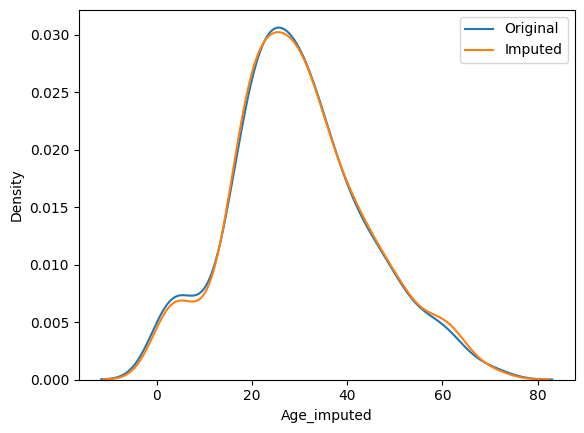

In [16]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [17]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.32755859902176


In [18]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,46.054006
Age,71.512440,204.349513,204.349513
Age_imputed,46.054006,204.349513,204.327559


<Axes: >

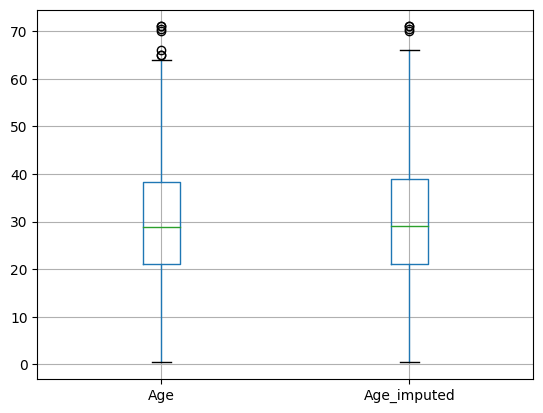

In [19]:
X_train[['Age', 'Age_imputed']].boxplot()


In [46]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


# apply on catigorical data set 

In [21]:
data = pd.read_csv('/kaggle/input/train-house-dataset/train (1).csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])


In [22]:
data.sample(5)

,FireplaceQu,GarageQual,SalePrice
1376,NaN,Fa,91000
755,NaN,TA,172500
620,NaN,NaN,67000
1016,TA,TA,203000
582,NaN,NaN,118500


In [23]:
data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [24]:
X = data
y = data['SalePrice']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [26]:

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [27]:
X_train.sample(5)


,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
146,NaN,Fa,105000,Fa,NaN
1296,NaN,TA,155000,TA,NaN
932,Gd,TA,320000,TA,Gd
27,Gd,TA,306000,TA,Gd
1268,Gd,TA,381000,TA,Gd


In [28]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipykernel_33/856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/tmp/i

In [29]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [30]:
temp

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [31]:

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.656566
TA,0.412439,0.533109
Fa,0.040917,0.053872
Po,0.027823,0.035915
Ex,0.024550,0.031425


/tmp/ipykernel_33/1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar

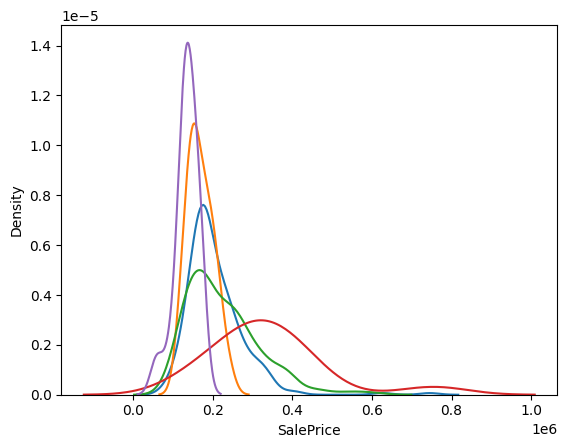

In [32]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipykernel_33/722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
s

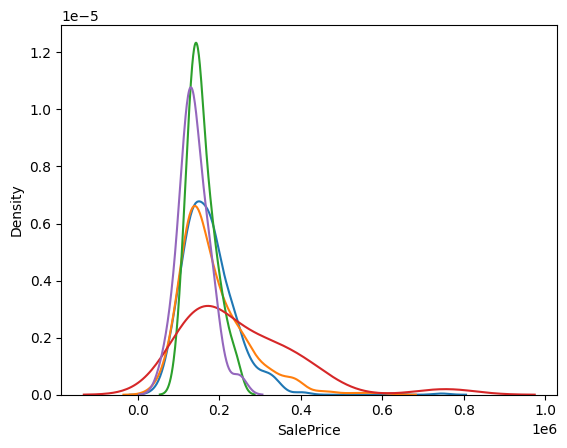

In [33]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# missing-indicator

In [84]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

In [85]:
df = pd.read_csv('/kaggle/input/titanic-train-csv/train.csv',usecols=['Age','Fare','Survived'])

In [86]:
df.sample()

,Survived,Age,Fare
418,0,30.0,13.0


In [87]:
X = df.drop(columns=['Survived'])
y = df['Survived']


In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [89]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [90]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [91]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

# Apply missing indicater

In [92]:
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [93]:
mi.features_

array([0])

In [94]:
X_train_missing = mi.transform(X_train)


In [95]:
X_test_missing = mi.transform(X_test)

In [96]:
# X_train_missing

In [97]:
X_train['Age_NA'] = X_train_missing


In [99]:
X_test['Age_NA'] = X_test_missing


In [100]:

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [102]:
si = SimpleImputer(add_indicator=True)


In [103]:
X_train = si.fit_transform(X_train)


In [104]:
X_test = si.transform(X_test)


In [105]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

# automatically-select-imputer-parameter

In [1]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/kaggle/input/titanic-train-csv/train.csv')

In [3]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


In [4]:

X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [6]:

numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [7]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [8]:

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [9]:
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [10]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [11]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [12]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")


Internal CV score: 0.788


In [13]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852
